Notebook to plot horizontal mean profiles and responses. Makes Figures 6 and 10.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.io as si
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [2]:
#Load data
sims = ['control', 'control_-1', 'control_+1', '+2K', '+2K_-1', '+2K_+1K']
d = len(sims)

var = ['TABS', 'RELH', 'CLD', 'MC']
v = len( var)

data = np.zeros( ( ( d, v, 64)))
for i in range( d ):
    for j in range( v ):
        data[i, j] = np.load( "data/mean_profiles_" + sims[i] + "_" + var[j] + ".dat")

In [3]:
press = np.load("data/3D_channel_300K_press.dat" )

In [4]:
#For plotting

def make_axis( ax ):

	ax.tick_params(axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on")                  
	ax.tick_params(axis="y", which="both", bottom="off", top="off",  labelbottom="off", left="on", right="off", labelleft="on")                                                                                        

	ax.tick_params( which = 'both', direction = 'out' )
	ax.tick_params( axis = 'both', which = 'major', length = 6 )
	ax.tick_params( axis = 'both', which = 'minor', length = 4 )

	majorLocator = MultipleLocator( 200 )
	majorFormatter = FormatStrFormatter('%d')
	minorLocator = MultipleLocator( 100 )

	ax.yaxis.set_major_locator(majorLocator)
	ax.yaxis.set_major_formatter(majorFormatter)
	ax.yaxis.set_minor_locator(minorLocator)
           
	ax.spines["top"].set_visible(False)    
	ax.spines["right"].set_visible(False)  

	plt.ylim([1000., 25.])
	plt.ylabel("Pressure [hPa]", fontsize = 18)
                                                                 
	return ax

def make_axis2( ax ):

	ax.tick_params(axis = 'x', which = 'both', bottom="on", top = "off", labelbottom = "on")                  
	ax.tick_params(axis="y", which="both", bottom="off", top="off",  labelbottom="off", left="on", right="off", labelleft="on")                                                                                        

	ax.tick_params( which = 'both', direction = 'out' )
	ax.tick_params( axis = 'both', which = 'major', length = 6 )
	ax.tick_params( axis = 'both', which = 'minor', length = 4 )

	majorLocator = MultipleLocator( 20 )
	majorFormatter = FormatStrFormatter('%d')
	minorLocator = MultipleLocator( 5 )

	ax.yaxis.set_major_locator(majorLocator)
	ax.yaxis.set_major_formatter(majorFormatter)
	ax.yaxis.set_minor_locator(minorLocator)
           
	ax.spines["top"].set_visible(False)    
	ax.spines["right"].set_visible(False)  

	plt.ylim([300, 200])
	plt.ylabel("Temperature [K]", fontsize = 18)
                                       
	return ax

xlim_1 = [[190., 310], [0., 90.], [0., 0.1],[0., 0.01], [0., 90.], [200., 310], [-0.004, 0.012], [-3., 0.] ]
xlim_2 = [[-2., 10.], [-14., 14.], [-0.05, 0.05],  [-0.0014, 0.0014]]
xlabs = ["Temperature [K]", "Relative humidity [%]", "Cloud fraction", "Cloud mass flux [kg/m$^2$/s]", "Relative humidity [%]", "Temperature [K]", "Convective mass flux [kg/m$^2$/s]", "Radiative heating [K/day]"]

maj_space_1 = [40, 20, 0.04, 0.005, 20, 20, 0.01, 1.]
min_space_1 = [10, 10, 0.01, 0.00125, 5, 5, 0.002, 0.25]
maj_space_2 = [2, 5, 0.02, 0.02, 10, 4, 0.002, 0.5]
min_space_2 = [1., 2.5, 0.005, 0.005, 2.5, 1, 0.0005, 0.1]
al = [1., 1., 1., 0.4, 0.4, 0.4]

# These are the "Tableau 20" colors as RGB.    
cs = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(cs)):    
    r, g, b = cs[i]    
    cs[i] = (r / 255., g / 255., b / 255.)  

colors = ['k', cs[0], cs[6], 'k', cs[0], cs[6]]
styles = ['-', '-', '-', '--', '--', '--']



/home/nick/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


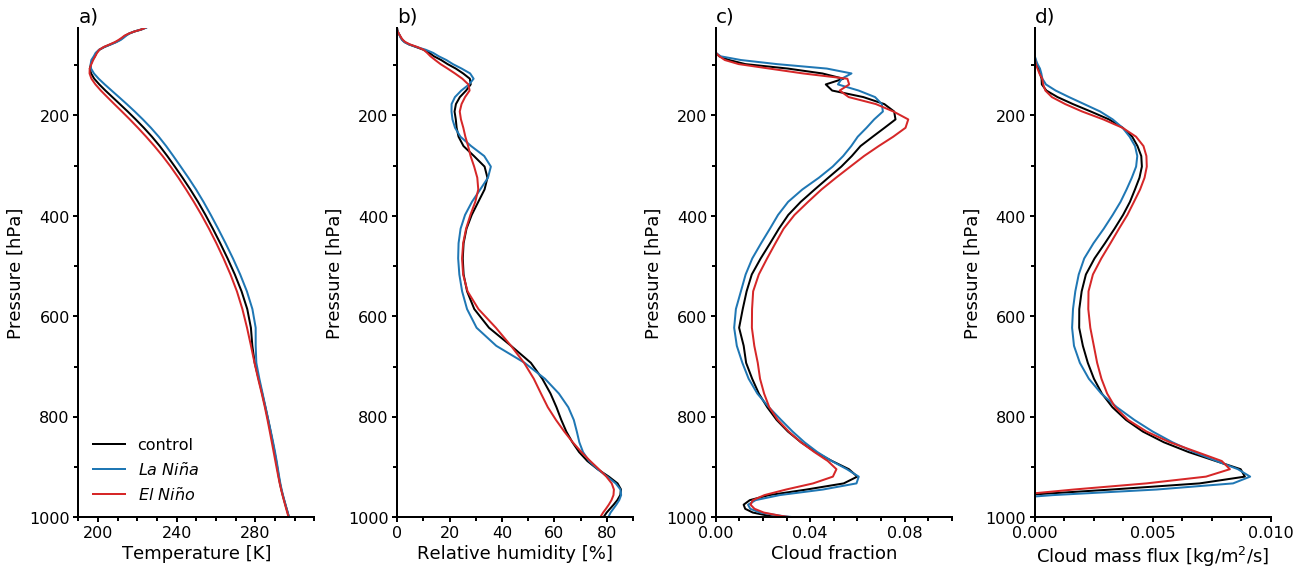

In [5]:
#Plot mean profiles in 300.5K simulations
fig = plt.figure( figsize = (18, 8) )
plt.subplots_adjust(left = 0.06, right = 0.98, bottom = 0.1, top = 0.95, wspace = 0.35, hspace = 0.4)

titles1 = ["a)", "b)", "c)", "d)"]

for j in range( v ):

    ax = plt.subplot(1, 4, j + 1)
    plt.title( titles1[j], fontsize = 20, loc = 'left' )
    for i in range( 3 ):
        plt.plot( data[i, j], press, color = colors[i], linestyle = styles[i], linewidth = 2., alpha = al[i] )

    make_axis( ax )
    plt.xlim(xlim_1[j] )
    plt.xlabel( xlabs[j], fontsize = 18)

    if j == 0:
        plt.legend(["control", "$La$ $Ni\~na$", "$El$ $Ni\~no$"], frameon = False, loc = "lower left", fontsize = 16 )

    majorLocator = MultipleLocator( maj_space_1[j] )
    minorLocator = MultipleLocator( min_space_1[j] )

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_minor_locator(minorLocator)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)

    for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
    ax.tick_params(which='minor', width=4)
    ax.tick_params(which='major', length= 5)
    ax.tick_params(which='both', width=2)


plt.savefig("3D_summary_profiles.png")
plt.savefig("3D_summary_profiles.pdf")


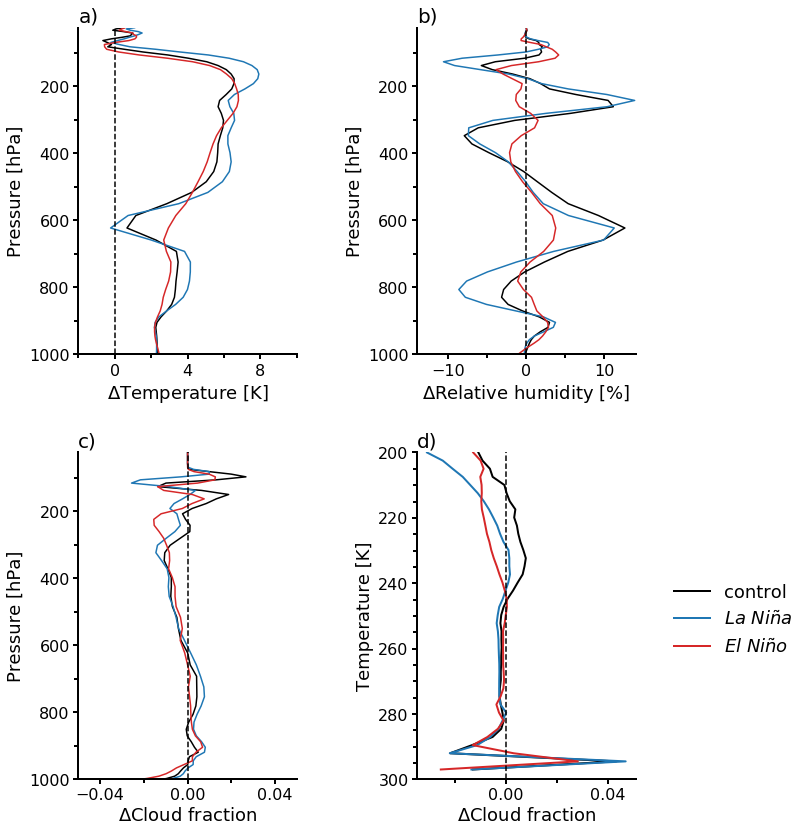

In [6]:
maj_space_2 = [4, 10, 0.04, 0.02, 10, 4, 0.002, 0.5]
min_space_2 = [2., 5, 0.02, 0.005, 2.5, 1, 0.0005, 0.1]

fig = plt.figure( figsize = (9, 12) )
plt.subplots_adjust(left = 0.12, right = 0.98, bottom = 0.08, top = 0.95, hspace = 0.3, wspace = 0.55)

titles1 = ["a)", "b)", "c)", "d)", "e)"]

for j in range( 4 ):

    if j < 3:
        ax = plt.subplot(2, 2, j + 1)
        plt.title( titles1[j], fontsize = 20, loc = "left" )
        for i in range( 3 ):
            plt.plot( data[i + 3, j] - data[i, j], press, color = colors[i], linestyle = styles[i], linewidth = 1.5 )
        plt.xlim(xlim_2[j] )
        plt.xlabel( "$\Delta$" + xlabs[j], fontsize = 18)
        majorLocator = MultipleLocator( maj_space_2[j] )
        minorLocator = MultipleLocator( min_space_2[j] )
        make_axis( ax )
    
    else:
        #Plot as function of temperature
        ax = plt.subplot(2, 2, j + 1)
        plt.title( titles1[j], fontsize = 20, loc = "left" )
        temps = np.linspace(297., 200., 40 )

        from scipy.interpolate import interp1d

        for i in range( 3 ):
            f = interp1d(data[i, 0, :48], data[i, 2, :48] )
            f2 = interp1d(data[i + 3, 0, :48], data[i + 3, 2, :48] )

            con = f(temps )
            resp = f2( temps )
            plt.plot( resp - con, temps, color = colors[i], linestyle = styles[i], linewidth = 2. )

        #plt.xlim(xlim_2[j - 1] )
        plt.xlabel( "$\Delta$" + xlabs[j - 1], fontsize = 18)
        majorLocator = MultipleLocator( maj_space_2[j - 1] )
        minorLocator = MultipleLocator( min_space_2[j - 1] )
        make_axis2( ax )
    
    plt.axvline( x = 0., color = 'k', linestyle = '--' )

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_minor_locator(minorLocator)

    if j == 3:
        plt.legend(["control", "$La$ $Ni\~na$", "$El$ $Ni\~no$"], frameon = False, fontsize = 18, bbox_to_anchor=(1.1, 0.65) )

    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    ax.tick_params(which='minor', width=4)
    ax.tick_params(which='major', length= 5)
    ax.tick_params(which='both', width=2)
    
    

plt.savefig("3D_response_profiles.png")
plt.savefig("3D_response_profiles.pdf")
